In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [212]:
pd.set_option('display.max_columns', None)
fraud_data = pd.read_csv('creditcard.csv')
print(f"Dataset shape: {fraud_data.shape}")
print(f"\nData types and info:")
print(fraud_data.info())
print(f"\nSummary statistics:")
print(fraud_data.describe())
print(f"\nFirst 5 rows:")
fraud_data.head()

Dataset shape: (284807, 31)

Data types and info:
<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


=== CLASS DISTRIBUTION ===
Class
0    284315
1       492
Name: count, dtype: int64

Percentage:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

=== IMBALANCE ANALYSIS ===
Legitimate transactions: 284,315
Fraudulent transactions: 492
Fraud rate: 0.1727%
Imbalance ratio: 577.9:1
For every 1 fraud, there are 578 legitimate transactions


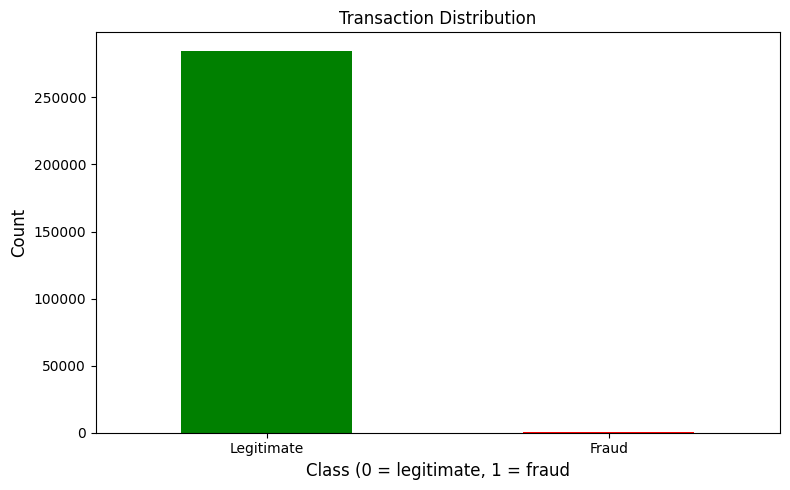

In [213]:
# Check class distribution
print("=== CLASS DISTRIBUTION ===")
print(fraud_data['Class'].value_counts())
print(f"\nPercentage:")
print(fraud_data['Class'].value_counts(normalize=True) * 100)

# Calculate imbalance ratio
legit_count = (fraud_data['Class'] == 0).sum()
fraud_count = (fraud_data['Class'] == 1).sum()
imbalance_ratio = legit_count / fraud_count

print(f"\n=== IMBALANCE ANALYSIS ===")
print(f"Legitimate transactions: {legit_count:,}")
print(f"Fraudulent transactions: {fraud_count}")
print(f"Fraud rate: {fraud_count/len(fraud_data)*100:.4f}%")
print(f"Imbalance ratio: {imbalance_ratio:.1f}:1")
print(f"For every 1 fraud, there are {imbalance_ratio:.0f} legitimate transactions")

#Visualization

fig,ax = plt.subplots(figsize = (8,5))

fraud_data['Class'].value_counts().plot(kind = 'bar',color = ['green','red'],ax = ax)
ax.set_xlabel('Class (0 = legitimate, 1 = fraud',fontsize = 12)
ax.set_ylabel('Count',fontsize = 12)
ax.set_title('Transaction Distribution',fontsize = 12)
ax.set_xticklabels(['Legitimate','Fraud'],rotation = 0)
plt.tight_layout()
plt.show()

=== TRANSACTION AMOUNT ANALYSIS
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


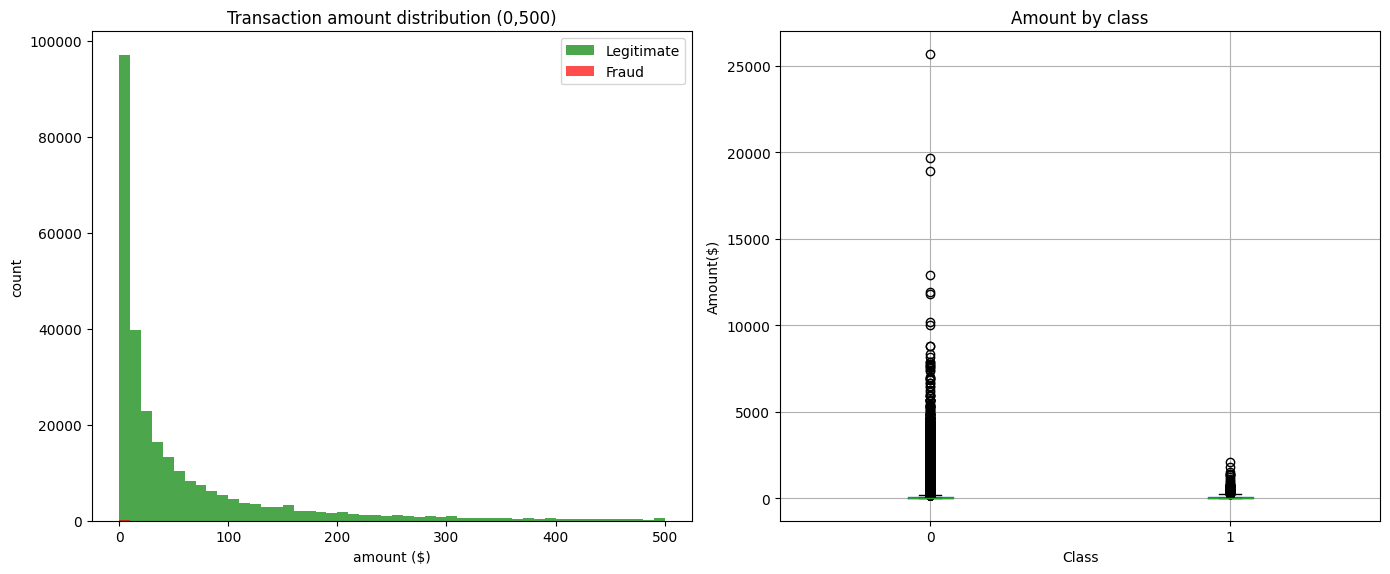

average amount of legit transactions is 88.29
average amount of fraud transactions is 122.21


In [214]:
print('=== TRANSACTION AMOUNT ANALYSIS')
print(fraud_data.groupby('Class')['Amount'].describe())

fig,axes = plt.subplots(1,2,figsize = (14,6))

axes[0].hist(fraud_data[fraud_data['Class']== 0]['Amount'],bins = 50,color = 'green',alpha = 0.7,range = (0,500),label = 'Legitimate')
axes[0].hist(fraud_data[fraud_data['Class']== 1]['Amount'],bins = 50,color = 'red',alpha = 0.7,range = (0,500),label = 'Fraud')
axes[0].set_ylabel('count')
axes[0].set_xlabel('amount ($)')
axes[0].set_title('Transaction amount distribution (0,500)')
axes[0].legend()

fraud_data.boxplot(column = 'Amount',by = 'Class',ax = axes[1])
axes[1].set_title('Amount by class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Amount($)')
plt.suptitle('')
plt.tight_layout()
plt.show()

legit_avg = fraud_data[fraud_data['Class'] == 0]['Amount'].mean()
fraud_avg = fraud_data[fraud_data['Class'] == 1]['Amount'].mean()
print(f'average amount of legit transactions is {legit_avg:.2f}')
print(f'average amount of fraud transactions is {fraud_avg:.2f}')

=== time analysis ===
time range is from 0 to 172792 seconds
Duration 48.0 hours 2.0 days


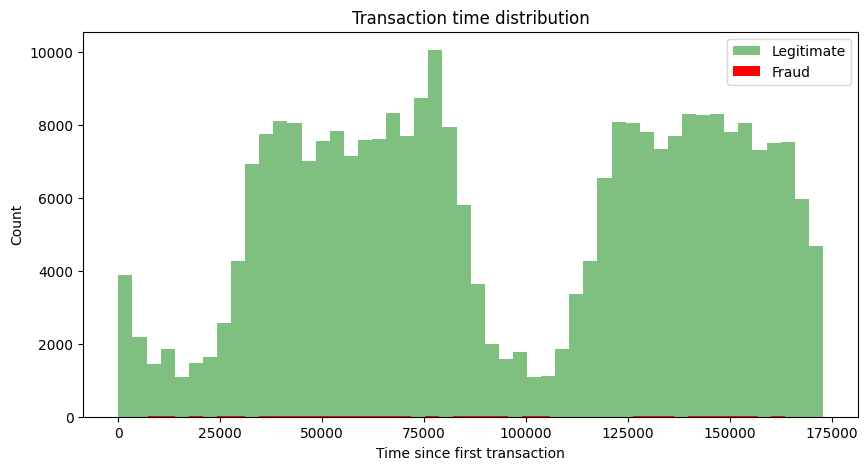

In [215]:
print("=== time analysis ===")
print(f"time range is from {fraud_data['Time'].min():.0f} to {fraud_data['Time'].max():.0f} seconds")
print(f"Duration {fraud_data['Time'].max()/3600:.1f} hours {fraud_data['Time'].max()/3600/24:.1f} days")

fig,ax = plt.subplots(figsize = (10,5))
ax.hist(fraud_data[fraud_data['Class']==0]['Time'],alpha = 0.5,color = 'green',bins = 50,label = 'Legitimate')
ax.hist(fraud_data[fraud_data['Class']==1]['Time'],alpha = 1,color = 'red',bins = 50,label = 'Fraud')
ax.set_title('Transaction time distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Time since first transaction')
ax.legend()

In [216]:
print('=== data quality ===')
missing = fraud_data.isnull().sum()
print(missing)
print('missing values per column')
print(missing[missing>0] if missing.sum() > 0 else "No missing data")
print('types of data\n',fraud_data.dtypes.value_counts())

=== data quality ===
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
missing values per column
No missing data
types of data
 float64    30
int64       1
Name: count, dtype: int64


## Day 1: Extreme Imbalance Analysis

### Dataset Overview
- **Total transactions:** 284,807
- **Fraud transactions:** 492 (0.17%)
- **Legitimate transactions:** 284,315 (99.83%)
- **Imbalance ratio:** 577.9:1

### The Accuracy Trap
Predicting "all legitimate" gives:
- Accuracy: **99.83%** ← looks amazing!
- Frauds caught: **0** ← completely useless!

This is **160x more imbalanced** than the churn problem.

### Transaction Amount Insights
- Fraud average: $122.21
- Legit average: $88.29
- **Surprise:** Only 38% higher — fraudsters test cards with small amounts
- Box plot shows both classes have similar ranges with many outliers

### Time Patterns
- Data spans: 48 hours (2 days)
- Legitimate: Clear daily cycles (peaks/valleys)
- Fraud: More evenly distributed across time


In [217]:
from sklearn.model_selection import train_test_split

train_X = fraud_data.drop('Class',axis = 1)
train_Y = fraud_data['Class']
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_Y,test_size = 0.2,random_state = 42,stratify = train_Y)

print("training set: ",X_train.shape)
print("test set: ",X_test.shape)
print(f"fraud rate in training: {Y_train.mean():.4f}")
print(f"fraud rate in test: {Y_test.mean():.4f}")
print(f"frauds in training: {Y_train.sum()}")
print(f"frauds in test: {Y_test.sum()}")

training set:  (227845, 30)
test set:  (56962, 30)
fraud rate in training: 0.0017
fraud rate in test: 0.0017
frauds in training: 394
frauds in test: 98


In [218]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report

baseline_pred = np.zeros(len(Y_test))

print('=== BASELINE PREDICTION ===')
print(f'accuracy {accuracy_score(Y_test,baseline_pred):.4f}')
print(f'recall {recall_score(Y_test,baseline_pred,zero_division = 0):.4f}')
print(f'precision {precision_score(Y_test,baseline_pred,zero_division = 0):.4f}')
print(f'f1 score {f1_score(Y_test,baseline_pred,zero_division = 0):.4f}')

print('=== The Trap ===')
print(f'baseline accuracy looks good {accuracy_score(Y_test,baseline_pred):.4f}')
print(f'but it catches zero frauds out of {Y_test.sum()} actual frauds')
print(f'this is why accuracy is useless for fraud detection')


=== BASELINE PREDICTION ===
accuracy 0.9983
recall 0.0000
precision 0.0000
f1 score 0.0000
=== The Trap ===
baseline accuracy looks good 0.9983
but it catches zero frauds out of 98 actual frauds
this is why accuracy is useless for fraud detection


In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
naive_lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_scaled,Y_train)
naive_pred = naive_lr.predict(X_test_scaled)

print(f'accuracy {accuracy_score(Y_test,naive_pred):.4f}')
print(f'recall {recall_score(Y_test,naive_pred,zero_division = 0):.4f}')
print(f'precision {precision_score(Y_test,naive_pred,zero_division = 0):.4f}')
print(f'f1 score {f1_score(Y_test,naive_pred,zero_division = 0):.4f}')

print(f"classification report {classification_report(Y_test,naive_pred,target_names = ['Legitimate','Fraud'])}")

accuracy 0.9991
recall 0.6327
precision 0.8267
f1 score 0.7168
classification report               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56864
       Fraud       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [220]:
from xgboost import XGBClassifier

naive_XGB = XGBClassifier(n_estimators = 100,learning_rate = 0.1,max_depth = 5,random_state = 42,eval_metric = 'logloss').fit(X_train,Y_train)
naive_XGB_pred = naive_XGB.predict(X_test)
print(f'accuracy {accuracy_score(Y_test,naive_XGB_pred):.4f}')
print(f'recall {recall_score(Y_test,naive_XGB_pred,zero_division = 0):.4f}')
print(f'precision {precision_score(Y_test,naive_XGB_pred,zero_division = 0):.4f}')
print(f'f1 score {f1_score(Y_test,naive_XGB_pred,zero_division = 0):.4f}')

print(f"classification report {classification_report(Y_test,naive_XGB_pred,target_names = ['Legitimate','Fraud'])}")

accuracy 0.9995
recall 0.7755
precision 0.9157
f1 score 0.8398
classification report               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56864
       Fraud       0.92      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [221]:
from sklearn.metrics import confusion_matrix

models = [('Baseline',baseline_pred),
          ('Naive LR',naive_pred),
          ('Naive XGB',naive_XGB_pred)]
print('=== MODEL COMPARISON ===')
comparison = pd.DataFrame({
    'Model' : [name for name , _ in models],
    'Accuracy' : [accuracy_score(Y_test,pred) for _,pred in models],
    'Recall' : [recall_score(Y_test,pred,zero_division = 0)for _, pred in models],
    'Precision': [precision_score(Y_test,pred,zero_division = 0)for _, pred in models],
    'F1 score' : [f1_score(Y_test,pred,zero_division = 0)for _, pred in models],
})
print(comparison.to_string(index=False))

print('=== naive xgboost confusion matrix ===')
cm = confusion_matrix(Y_test,naive_XGB_pred)
tn, fp, fn, tp = cm.ravel()
print(f'true negatives (correct legit) {tn:,}')
print(f'false positive (false alarm) {fp:,}')
print(f'false negative (missed fraud){fn:,}')
print(f'true positive (caught fraud){tp:,}')

print('=== THE PROBLEM ===')
print(f'we caught {tp} out of {tp + fn} ({tp/(tp+fn)*100:.2f})')
print(f'we missed {fn} frauds')
print('each missed fraud = lose money')

=== MODEL COMPARISON ===
    Model  Accuracy   Recall  Precision  F1 score
 Baseline  0.998280 0.000000   0.000000  0.000000
 Naive LR  0.999140 0.632653   0.826667  0.716763
Naive XGB  0.999491 0.775510   0.915663  0.839779
=== naive xgboost confusion matrix ===
true negatives (correct legit) 56,857
false positive (false alarm) 7
false negative (missed fraud)22
true positive (caught fraud)76
=== THE PROBLEM ===
we caught 76 out of 98 (77.55)
we missed 22 frauds
each missed fraud = lose money


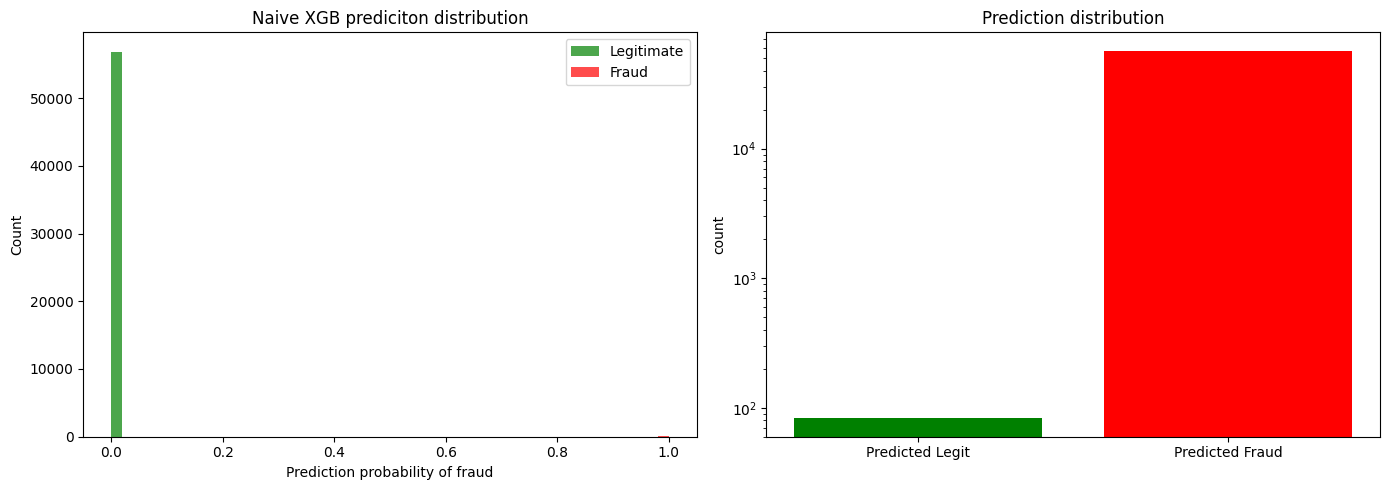

Model prediction fraud for 83 out of 56962
thats 0.15 fraud detection rate


In [222]:
##### Look at prediction probabilities for naive XGBoost

fig,axes = plt.subplots(1,2,figsize = (14,5))
axes[0].hist(naive_XGB_pred[Y_test == 0],bins = 50,alpha = 0.7,color = 'green',label = 'Legitimate',range = (0,1))
axes[0].hist(naive_XGB_pred[Y_test == 1],bins = 50,alpha = 0.7,color = 'red',label = 'Fraud',range = (0,1))
axes[0].set_xlabel('Prediction probability of fraud')
axes[0].set_ylabel('Count')
axes[0].set_title('Naive XGB prediciton distribution')
axes[0].legend()

pred_counts = pd.Series(naive_XGB_pred).value_counts()
axes[1].bar(['Predicted Legit','Predicted Fraud'],[pred_counts.get(1,0),pred_counts.get(0,1)],color = ['green','red'])
axes[1].set_ylabel('count')
axes[1].set_title('Prediction distribution')
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()

print(f'Model prediction fraud for {pred_counts.get(1,0)} out of {len(Y_test)}')
print(f'thats {pred_counts.get(1,0)/len(Y_test) * 100:.2f} fraud detection rate')

## Day 2: Naive Models Fail at Extreme Imbalance

### Model Performance Comparison

| Model | Accuracy | Precision | Recall | F1 |
|-------|----------|-----------|--------|-----|
| Baseline | 99.83% | 0% | 0% | 0% |
| Naive LR | 99.91% | 83% | 63% | 72% |
| **Naive XGB** | **99.95%** | **92%** | **77.6%** | **84%** |

### The Core Problem
Even naive XGBoost (our best model):
- Misses **22 out of 98 frauds** (22.4%)
- High accuracy (99.95%) masks poor fraud detection
- Predicts fraud for only 83 transactions (0.15% of test set)

### Why Naive Approaches Fail
1. Models optimize for overall accuracy
2. With 577:1 imbalance, "predict legitimate" = 99.83% accuracy
3. Model learns to be conservative about predicting fraud
4. Minority class (fraud) gets insufficient attention

### Business Impact
- Missing 22 frauds per ~57,000 transactions
- Each fraud = lost money + customer trust damage
- False alarms (7 in our case) are much cheaper than missed frauds

### Tomorrow: Specialized Techniques
- SMOTE (create synthetic fraud examples)
- Class weights (make fraud errors cost 577x more)
- Undersampling (balance by removing legitimate transactions)
- Goal: Push recall above 90% while maintaining reasonable precision